In [2]:
import os
import importlib
import pickle
import pandas as pd

In [3]:
os.getcwd()

'C:\\Users\\aozcan\\PycharmProjects\\trx_forecast'

In [4]:
import sys
sys.path.append(os.getcwd())

In [5]:
import utils
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\aozcan\\PycharmProjects\\trx_forecast\\utils.py'>

In [6]:
WORK_DIR = os.getcwd()

In [7]:
DATA_PATH = os.path.join("./data")
CAT_PATH = os.path.join(DATA_PATH, "category_list.csv")
ITEM_PATH = os.path.join(DATA_PATH, "item_list.csv")
SHOP_PATH = os.path.join(DATA_PATH, "shop_list.csv")
TRX_PATH = os.path.join(DATA_PATH, "transaction.csv")


In [8]:
item_df = pd.read_csv(ITEM_PATH, index_col=0)
cat_df = pd.read_csv(CAT_PATH, index_col=0)
shop_df = pd.read_csv(SHOP_PATH, index_col=0)
trx_df = pd.read_csv(TRX_PATH, index_col=0)

In [9]:
item_df.head()

item_name  item_id  item_category_id
0        ! IN THE GRIP OF GLAMOUR (PLAST.)         D   100000              1040
1  ! ABBYY FineReader 12 Professional Edition Ful...   100001              1076
2                           IN THE SPOTLIGHT (UNV) D   100002              1040
3                                 BLUE WAVE (Univ) D   100003              1040
4                                      BOX (GLASS) D   100004              1040

In [10]:
utils.check_df(cat_df)

##################### Shape #####################
(84, 2)
##################### Types #####################
item_category_name    object
item_category_id       int64
dtype: object
##################### Head #####################
         item_category_name  item_category_id
0  PC - Headsets/Headphones              1000
1         Accessories - PS2              1001
2         Accessories - PS3              1002
3         Accessories - PS4              1003
4         Accessories - PSP              1004
##################### Tail #####################
     item_category_name  item_category_id
79              Service              1079
80    Service - Tickets              1080
81   Pure media (spire)              1081
82  Blank media (piece)              1082
83            Batteries              1083
##################### NA #####################
item_category_name    0
item_category_id      0
dtype: int64
##################### Quantiles #####################
                  count    mean 

In [11]:
utils.check_df(item_df) # will create v_item_lookup

##################### Shape #####################
(22170, 3)
##################### Types #####################
item_name           object
item_id              int64
item_category_id     int64
dtype: object
##################### Head #####################
                                           item_name  item_id  item_category_id
0        ! IN THE GRIP OF GLAMOUR (PLAST.)         D   100000              1040
1  ! ABBYY FineReader 12 Professional Edition Ful...   100001              1076
2                           IN THE SPOTLIGHT (UNV) D   100002              1040
3                                 BLUE WAVE (Univ) D   100003              1040
4                                      BOX (GLASS) D   100004              1040
##################### Tail #####################
                                               item_name  item_id  item_category_id
22165             Nuclear Titbit 2 [PC, Digital Version]   122165              1031
22166     1C:Enterprise Query Language [Digital 

In [12]:
utils.check_df(shop_df)

##################### Shape #####################
(60, 2)
##################### Types #####################
shop_name    object
shop_id       int64
dtype: object
##################### Head #####################
                         shop_name  shop_id
0  !Yakutsk Ordzhonikidze, 56 fran       99
1  !Yakutsk, TC "Tsentralnyi" fran      100
2                 Адыгея ТЦ "Мега"      101
3    Balashikha TRC "Oktay-Konmir"      102
4         Volzhsky TC "Volga Mall"      103
##################### Tail #####################
                      shop_name  shop_id
55  1C-Online Digital Warehouse      154
56       Chekhov SEC "Karnaval"      155
57   Yakutsk, Ordzhonikidze, 56      156
58     Yakutsk, TC "Tsentralny"      157
59       Yaroslavl, TC "Altair"      158
##################### NA #####################
shop_name    0
shop_id      0
dtype: int64
##################### Quantiles #####################
         count   mean        std   min    0%      5%    50%     95%     99%   100%    

In [13]:
print("unique num:", shop_df["shop_name"].nunique())
shop_df["shop_name"].unique()[:5] # lots of feature engineering here

unique num: 60


array(['!Yakutsk Ordzhonikidze, 56 fran',
       '!Yakutsk, TC "Tsentralnyi" fran', 'Адыгея ТЦ "Мега"',
       'Balashikha TRC "Oktay-Konmir"', 'Volzhsky TC "Volga Mall"'],
      dtype=object)

In [14]:
utils.check_df(trx_df)

##################### Shape #####################
(2882335, 5)
##################### Types #####################
date       object
shop        int64
item        int64
price     float64
amount    float64
dtype: object
##################### Head #####################
         date  shop    item   price  amount
0  02.01.2013   158  122154  3244.0     1.0
1  03.01.2013   124  102552  2920.0     1.0
2  05.01.2013   124  102552  2920.0    -1.0
3  06.01.2013   124  102554  5550.0     1.0
4  15.01.2013   124  102555  3569.0     1.0
##################### Tail #####################
               date  shop    item   price  amount
2882330  27.09.2015   124  121022  5842.0     1.0
2882331  19.09.2015   124  121105  5842.0     1.0
2882332  30.09.2015   124  121088  4219.0     1.0
2882333  08.09.2015   124  120990  4219.0     1.0
2882334  25.09.2015   124  120303  1296.0     1.0
##################### NA #####################
date      0
shop      0
item      0
price     0
amount    0
dtype: int64
#

## Store Basis EDA

<Axes: >

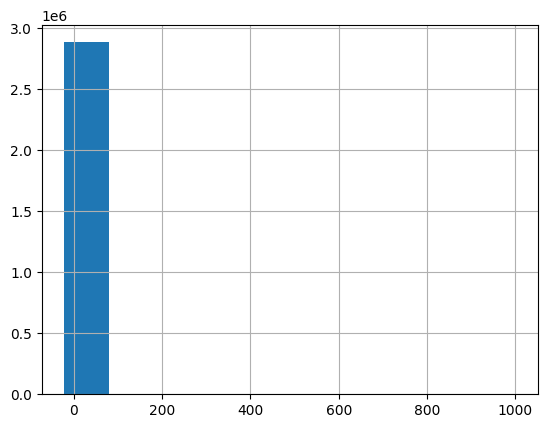

In [15]:
trx_df["amount"].hist(bins = 10)

In [16]:
print("number unique shop:", trx_df["shop"].nunique())
trx_df["shop"].unique()[:5]

number unique shop: 59


array([158, 124, 123, 122, 118], dtype=int64)

In [17]:
item_df.columns

Index(['item_name', 'item_id', 'item_category_id'], dtype='object')

In [18]:
item_cat_df = pd.merge(cat_df, item_df, left_on = ["item_category_id"], right_on = ["item_category_id"], how = "inner")

In [19]:
item_df.count()

item_name           22170
item_id             22170
item_category_id    22170
dtype: int64

In [20]:
item_cat_df

item_category_name  item_category_id                                          item_name  item_id
0                PC - Headsets/Headphones              1000  PC: HyperX Cloud Core Stereo Gaming Headset (K...   105441
1                PC - Headsets/Headphones              1000                      PHILIPS SBC HC8680 headphones   116255
2                PC - Headsets/Headphones              1000                           RITMIX RH-120 Headphones   116256
3                PC - Headsets/Headphones              1000                     RITMIX RH-124 Black Headphones   116257
4                       Accessories - PS2              1001                PS2: Memory Card 8Mb - 102304: SCEE   105606
5                       Accessories - PS2              1001  Pelican. Геймпад Nerf Wireless Controller PS2 ...   105740
6                       Accessories - PS3              1002                                 PS Move Controller   105570
7                       Accessories - PS3              1002                             PS Move Gun Attachment   105571
8                       Accessories - PS3              1002  PS Move Motion Controller (Контроллер движений...   105572
9                       Accessories - PS3              1002  PS Move Motion Controller Charger (Зарядная ст...   105573
10                      Accessories - PS3              1002                      PS Move Navigation Controller   105574
11                      Accessories - PS3              1002                              PS Move Sharp Shooter   105575
12                      Accessories - PS3              1002  PS Move Starter Pack (PS Eye Camera + PS Move ...   105576
13                      Accessories - PS3              1002  PS3/PC: Gioteck VX-2 Wireless Gamepad (VX2PS3-...   105607
14                      Accessories - PS3              1002  PS3/PC: Gioteck VX-2 Wired Gamepad (VX2PS3-11-MU)   105608
15                      Accessories - PS3              1002  PS3/X360: Turtle Beaсh. EarForce PX21. Gaming ...   105609
16                      Accessories - PS3              1002  PS3: Turtle Beaсh. EarForce P11. Gaming Stereo...   105610
17                      Accessories - PS3              1002  PS3: Turtle Beaсh. EarForce PLa. Gaming Stereo...   105611
18                      Accessories - PS3              1002  PS3: Wireless Stereo Headset for PS3 (Wireless...   105612
19                      Accessories - PS3              1002   PS3: Pulse Wireless Stereo Headset: CECHYA-0086:   105613
20                      Accessories - PS3              1002  PS3: Гарнитура для PS3 (Bluetooth Headset Boxe...   105614
21                      Accessories - PS3              1002  PS3: Gioteck SC-1 Sports Wireless Gamepad (SC1...   105615
22                      Accessories - PS3              1002  PS3: Gioteck VX-1 Wireless Gamepad (VX1PS3-41-M0)   105616
23                      Accessories - PS3              1002  PS3: Madcatz MLG Pro-Circuit Wired Gamepad (ML...   105617
24                      Accessories - PS3              1002  PS3: Dual SFX Frag Pro/Shark Joystick (Wireles...   105618
25                      Accessories - PS3              1002      PS3: Frag FX Piranha Red Joystick (Wired Kit)   105619
26                      Accessories - PS3              1002  PS3: Gioteck AC-1 Ammo Clip Portable Charging ...   105620
27                      Accessories - PS3              1002     PS3: Artplays HDMI Cable 2m (ver. 1.4) blister   105621
28                      Accessories - PS3              1002   PS3: Кабель HDMI IT 1.8м Defender PRO (ver. 1.4)   105622
29                      Accessories - PS3              1002     PS3: Кабель HDMI IT 3м Defender PRO (ver. 1.4)   105623
30                      Accessories - PS3              1002  PS3: Controller Black (DS Wireless Black: CECH...   105624
31                      Accessories - PS3              1002  PS3: "Controller Black (DS Wireless Black: CEC...   105625
32                      Accessories - PS3              1002  PS

In [21]:
trx_df["net"] = trx_df["amount"] * trx_df["price"]

In [22]:
shop_format_df = trx_df.groupby("shop").agg({"shop": "count","net": "sum", "amount": "sum"})

In [23]:
shop_format_df["mean_income_per_item"] = shop_format_df["net"] / shop_format_df["amount"]

<Axes: >

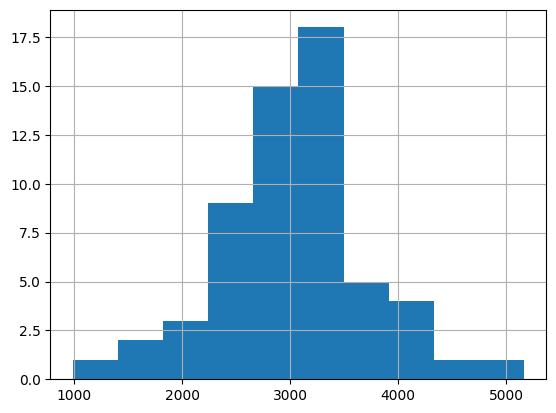

In [24]:
shop_format_df["mean_income_per_item"].hist(bins = 10) # i will flag 3 cluster to model that data

In [25]:
shop_format_df["mean_income_per_trx"] = shop_format_df["net"] / shop_format_df["shop"]

<Axes: >

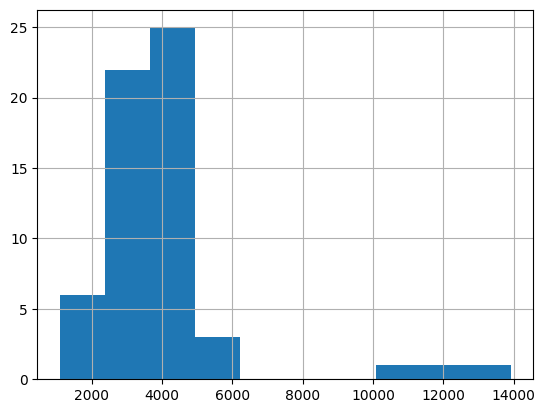

In [26]:
shop_format_df.mean_income_per_trx.hist(bins = 10) # we can use k means to segment stores then
# time series operations

## Cat Basis EDA


In [27]:
trx_cat_df = trx_df.merge(item_cat_df, left_on = ["item"], right_on = ["item_id"], how = "inner")

In [28]:
trx_cat_df.drop(columns ="item_id", inplace = True)

In [29]:
trx_cat_df.count()

date                  2882335
shop                  2882335
item                  2882335
price                 2882335
amount                2882335
net                   2882335
item_category_name    2882335
item_category_id      2882335
item_name             2882335
dtype: int64

In [30]:
trx_cat_df.date.min()

'01.01.2013'

In [31]:
trx_cat_df.date.max() # min 2 years of data seasonal affects should be considered

'31.12.2014'

In [32]:
trx_cat_df.head()

date  shop    item   price  amount     net             item_category_name  item_category_id                                 item_name
0  02.01.2013   158  122154  3244.0     1.0  3244.0                 Кино - Blu-Ray              1037                      PHENOMENON 2012 (BD)
1  03.01.2013   124  102552  2920.0     1.0  2920.0                  Music - Vinyl              1058  DEEP PURPLE  The House Of Blue Light  LP
2  05.01.2013   124  102552  2920.0    -1.0 -2920.0                  Music - Vinyl              1058  DEEP PURPLE  The House Of Blue Light  LP
3  06.01.2013   124  102554  5550.0     1.0  5550.0                  Music - Vinyl              1058  DEEP PURPLE  Who Do You Think We Are  LP
4  15.01.2013   124  102555  3569.0     1.0  3569.0  Music - CD Branded Production              1056   DEEP PURPLE 30 Very Best Of 2CD (Фирм.)

In [33]:
pd.set_option('display.float_format', '{:.1f}'.format)

In [34]:
# agg on cat group to analyze
trx_cat_temp = trx_cat_df.groupby("item_category_id").agg({"item_category_id":"count","amount": "sum", "net": "sum"})

In [35]:
trx_cat_temp["mean_income_per_trx"] = trx_cat_temp["net"] / trx_cat_temp["amount"]

<Axes: >

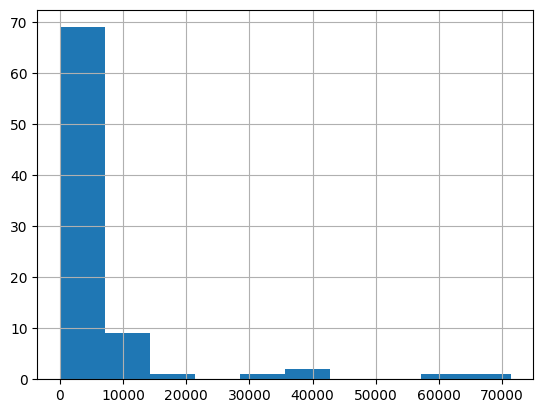

In [36]:
trx_cat_temp["mean_income_per_trx"].hist(bins = 10)

In [37]:
trx_cat_temp[trx_cat_temp.item_category_id > 500000] # item_category_id : count of item_cat_id

item_category_id   amount         net  mean_income_per_trx
item_category_id                                                            
1040                        557379 626491.0 545199369.0                870.2

In [38]:
trx_cat_df[trx_cat_df["item_category_id"] == 1000]

date  shop    item  price  amount   net        item_category_name  item_category_id                       item_name
5558    10.01.2013   124  116257  481.0     1.0 481.0  PC - Headsets/Headphones              1000  RITMIX RH-124 Black Headphones
182616  28.02.2013    99  116255  303.0     1.0 303.0  PC - Headsets/Headphones              1000   PHILIPS SBC HC8680 headphones
439377  02.04.2013   137  116256   74.0     1.0  74.0  PC - Headsets/Headphones              1000        RITMIX RH-120 Headphones

<Axes: >

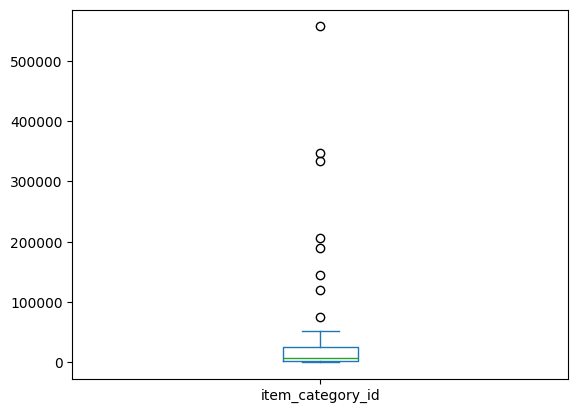

In [39]:
trx_cat_temp.item_category_id.plot(kind="box")  # item_category_id : count of item_cat_id

In [40]:
trx_cat_df.index = trx_cat_df.date

In [41]:
trx_cat_df.index = pd.to_datetime(trx_cat_df.index, format = "%d.%m.%Y")

In [42]:
trx_cat_df.drop(columns = ["date"], inplace = True)

In [43]:
grouper = trx_cat_df.groupby([pd.Grouper(freq='ME'), 'shop'])

In [44]:
seasonality_stores = grouper["amount"].count()

In [45]:
seasonality_stores = seasonality_stores.reset_index()

In [46]:
seasonality_stores = seasonality_stores.sort_values(by = "shop", ascending = True)

In [47]:
seasonality_stores.head(30)

date  shop  amount
0    2013-01-31    99    4793
45   2013-02-28    99    5064
1    2013-01-31   100    2694
46   2013-02-28   100    2984
456  2013-11-30   101     654
1371 2015-06-30   101     735
410  2013-10-31   101     634
365  2013-09-30   101     735
1414 2015-07-31   101     740
320  2013-08-31   101     792
1087 2014-12-31   101    1525
228  2013-06-30   101     750
183  2013-05-31   101     531
137  2013-04-30   101     556
1499 2015-09-30   101     675
91   2013-03-31   101     681
47   2013-02-28   101     454
1457 2015-08-31   101     845
274  2013-07-31   101     768
501  2013-12-31   101    1163
639  2014-03-31   101     830
1280 2015-04-30   101     627
687  2014-04-30   101     718
736  2014-05-31   101     713
1234 2015-03-31   101     639
785  2014-06-30   101     798
834  2014-07-31   101     691
1187 2015-02-28   101     766
884  2014-08-31   101     788
935  2014-09-30   101     709

<Axes: xlabel='shop'>

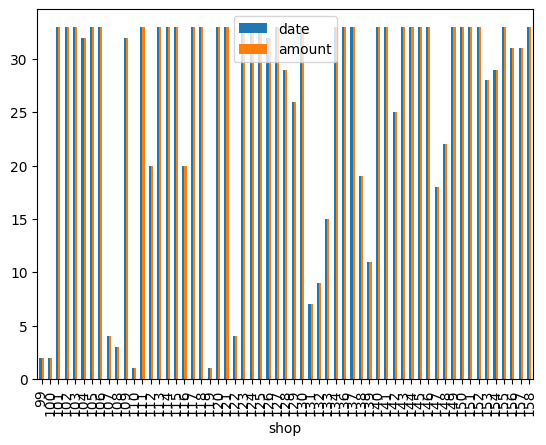

In [48]:
seasonality_stores.groupby("shop").count().plot(kind = "bar") # we could detect is_active stores,
# and seasonal stores


In [49]:
seasonality_stores.date.min()

Timestamp('2013-01-31 00:00:00')

In [50]:
seasonality_stores.date.max()

Timestamp('2015-09-30 00:00:00')

## Decision For Sake of Time

<Axes: >

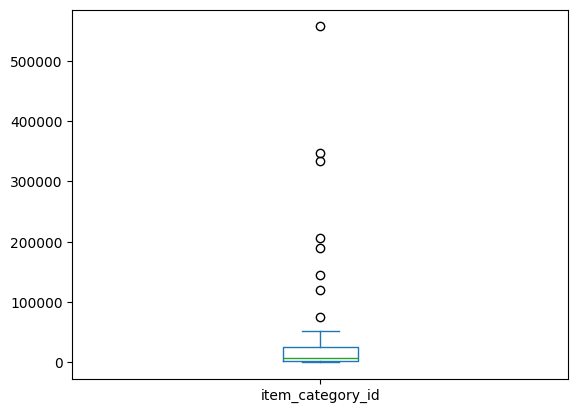

In [51]:
trx_cat_temp.item_category_id.plot(kind="box")  # item_category_id : count of item_cat_id

In [52]:
utils.check_df(trx_cat_temp)

##################### Shape #####################
(84, 4)
##################### Types #####################
item_category_id         int64
amount                 float64
net                    float64
mean_income_per_trx    float64
dtype: object
##################### Head #####################
                  item_category_id  amount         net  mean_income_per_trx
item_category_id                                                           
1000                             3     3.0       858.0                286.0
1001                             2     2.0      1401.0                700.5
1002                         18380 19515.0 140701220.0               7209.9
1003                         24380 28748.0 196354346.0               6830.2
1004                          2304  2407.0   4327538.0               1797.9
##################### Tail #####################
                  item_category_id  amount        net  mean_income_per_trx
item_category_id                                 

In [53]:
trx_cat_temp["cat_cluster"] = pd.qcut(trx_cat_temp["item_category_id"], q=[0, .5, .75, 1.], labels = False)

In [54]:
trx_cat_temp.rename(columns = {"item_category_id":"count_of_sales"}, inplace = True)

In [55]:
trx_cat_temp.reset_index(drop = False, inplace = True)

In [56]:
trx_cat_temp.head(1)

item_category_id  count_of_sales  amount   net  mean_income_per_trx  cat_cluster
0              1000               3     3.0 858.0                286.0            0

In [57]:
trx_cat_df.head(1)

shop    item  price  amount    net item_category_name  item_category_id             item_name
date                                                                                                     
2013-01-02   158  122154 3244.0     1.0 3244.0     Кино - Blu-Ray              1037  PHENOMENON 2012 (BD)

In [58]:
trx_cat_df = trx_cat_df.reset_index().merge(trx_cat_temp[["cat_cluster", "item_category_id"]], on=["item_category_id"], how="inner").set_index("date")

In [59]:
trx_cat_df.head(1)

shop    item  price  amount    net item_category_name  item_category_id             item_name  cat_cluster
date                                                                                                                  
2013-01-02   158  122154 3244.0     1.0 3244.0     Кино - Blu-Ray              1037  PHENOMENON 2012 (BD)            2

## Data Prep

In [60]:
# package documentation: https://unit8co.github.io/darts/generated_api/darts.timeseries.html
from darts import TimeSeries
import darts

In [61]:
darts.__version__

'0.29.0'

In [62]:
trx_cat_df.shop.nunique()

59

In [63]:
trx_cat_df.head(1)

shop    item  price  amount    net item_category_name  item_category_id             item_name  cat_cluster
date                                                                                                                  
2013-01-02   158  122154 3244.0     1.0 3244.0     Кино - Blu-Ray              1037  PHENOMENON 2012 (BD)            2

In [64]:
grouper = trx_cat_df.groupby([pd.Grouper(freq='ME'), 'shop', "item", "item_category_id", "cat_cluster"])

In [65]:
ts_df = grouper["amount"].sum()

In [66]:
ts_df = ts_df.reset_index()

In [67]:
date_index = pd.date_range(ts_df.date.min(), ts_df.date.max(), freq="ME")

In [68]:
dt_i = date_index.to_frame().reset_index(drop=True)

In [69]:
dt_i.columns = ["date"]

In [70]:
duos = ts_df[["shop","item","item_category_id", "cat_cluster"]]

In [71]:
duos.count()

shop                1577593
item                1577593
item_category_id    1577593
cat_cluster         1577593
dtype: int64

In [72]:
duos.drop_duplicates(inplace=True)

C:\Users\aozcan\AppData\Local\Temp\ipykernel_14612\2048507242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duos.drop_duplicates(inplace=True)


In [73]:
dt_i["key"] = 0

In [74]:
duos["key"] = 0

C:\Users\aozcan\AppData\Local\Temp\ipykernel_14612\1442827549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duos["key"] = 0


In [75]:
left = dt_i.merge(duos, on="key", how="outer").drop("key", axis=1)

In [76]:
left.count()

date                13761132
shop                13761132
item                13761132
item_category_id    13761132
cat_cluster         13761132
dtype: int64

In [77]:
left = left.merge(ts_df, on=["date","shop","item","item_category_id","cat_cluster"], how="outer")

In [ ]:
left.count()

In [ ]:
left.head(20)

In [ ]:
ts = TimeSeries.from_group_dataframe(df=left,
                                     group_cols=['item', "shop", "item_category_id", "cat_cluster"],
                                     freq="ME",
                                     n_jobs=-1,
                                     verbose=True,
                                     fillna_value=0,
                                     value_cols=["amount"],
                                     time_col="date") # target column
                                      # date column not passed index will be used

In [ ]:
with open("./data/ts", "wb") as file:
    pickle.dump(ts, file)

In [ ]:
import multiprocessing

multiprocessing.cpu_count()